# Assignment 3

As before, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. If you incorporate code from the internet (which is not required and generally not advisable), please cite the source within your code (providing a URL is sufficient).

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Question 1: Resampling via Bootstrapping

Now, we'll use the `iris` dataset, which we will add to Python using the `statsmodels` library. As always, start by reviewing a description of the dataset, by printing the dataset.

In [35]:
# Import
iris = sm.datasets.get_rdataset('iris', 'datasets')
df = pd.DataFrame(iris.data)

print(iris.data)
print(df.describe())

     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]
       Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.05

_(i)_ Create an `alpha_func(D, idx)` function which takes the `Sepal`'s `width` and `length` to calculate for alpha

In [36]:
def alpha_func(D, idx):
   cov_ = np.cov(D[['Sepal.Width','Sepal.Length']].loc[idx], rowvar=False)
   return ((cov_[1,1] - cov_[0,1]) /
           (cov_[0,0]+cov_[1,1]-2*cov_[0,1]))

Test the code below

In [37]:
alpha_func(df, range(100))

0.6189498510165619

_(ii)_ Construct a new bootstrap data set and recompute alpha

In [38]:
rng = np.random.default_rng(0)
alpha_func(df,
           rng.choice(100,
                      100,
                      replace=True))

0.6675354865158225

Imagine we are analysts working for a shipping company. The company wants to know the average length of iris' petals, to inform space allotment on an upcoming shipment. The relevant variable in the dataset is `Sepal.Length`. 

_(iii)_ Why is it (perhaps) not sufficient to simply calculate the mean of `Sepal.Length`? What more information will preforming a bootstrap provide to us?  

_(iv)_ We can perform bootstrapping in Python by defining a simple function using `boot_SE()` for computing the bootstrap standard error. Remember, because bootstrapping involves randomness, we must first set a seed for reproducibility!

In [63]:
# (iii) The mean of Sepal.Length will reflect the average skew in data, but is not a true representation of a majority of the samples. Bootstrap while iterative and compute intense will still provide a more meaningful value to estimate space allotment.

# (iv) 
# Define the bootstrap standard error function for index-based resampling

# Number of bootstrap samples
n_bootstrap_samples = 1000

# Initialize an array to store the mean of each bootstrap sample
BOOT_VALUES = np.zeros(n_bootstrap_samples)

def boot_SE(D,
            B=n_bootstrap_samples,
            seed=0):
    rng = np.random.default_rng(seed)
    n = D.shape[0]
    
# Generate bootstrap samples and compute the mean for each sample
    for i in range(B):
        idx = rng.choice(D.index,
                             n,
                             replace=True)
        value = alpha_func(D, idx)
        BOOT_VALUES[i] = value

    return np.std(np.array(BOOT_VALUES))

_(v)_ Evaluate the accuracy of our alpha estimate with B = 1000

In [64]:
# (v) Apply the boot_SE_index_based function to compute the standard error of the alpha statistic
BOOT_SE_ALPHA = boot_SE(df[['Sepal.Width','Sepal.Length']])
print(f"Bootstrap standard error of the alpha statistic: {BOOT_SE_ALPHA:.4f}")

Bootstrap standard error of the alpha statistic: 0.0318


_(vi)_ What is the original mean value of `Sepal.Length`?

In [79]:
# (vi)

MEAN = np.mean(df['Sepal.Length'])
print("Mean value of Sepal Length = {:.4f}".format(MEAN))


Mean value of Sepal Length = 5.8433


Next, let's create a new bootstrapping to bootstrap samples (`boot_se_samples`) of `Sepal.Length`, in order to compute its bootstrapped mean and standard deviation.

_(vii)_. Write code to review the bootstrapped mean value, and the standard deviation of the bootstrapped samples. Compare the mean against its original value. Then, review the bootstrapped range, by using `t_range = np.ptp(boot_se_samples)`.

In [83]:
# Number of bootstrap samples
n_bootstrap_samples = 1000

# Initialize an array to store the mean of each bootstrap sample
BOOT_MEANS = []

def boot_SE(D,
            B=n_bootstrap_samples,
            seed=0):
    rng = np.random.default_rng(seed)
    n = len(D)
    
    for _ in range(B):
        sample = rng.choice(D,
                             n,
                             replace=True)
        mean_val =  sample.mean()
        BOOT_MEANS.append(mean_val)

    return np.std(np.array(BOOT_MEANS))

BST_SE = boot_SE(df['Sepal.Length'])
print("Boostraped standard deviation = {:.4f}".format(BST_SE))

BST_MEAN = np.mean(BOOT_MEANS)
print("Boostraped mean = {:.4f}".format(BST_MEAN))

print("Means are MEAN: {:.4f} and BST_MEAN: {:.4f}".format(MEAN, BST_MEAN))

# range
t_range = np.ptp(BOOT_MEANS) #difference between the maximum and minimum values in the boot_se_samples
print("Range for bootstraped samples is = {:.4f}".format(t_range))

Boostraped standard deviation = 0.0665
Boostraped mean = 5.8423
Means are MEAN: 5.8433 and BST_MEAN: 5.8423
Range for bootstraped samples is = 0.3873


_(viii)_ Next, let's compute 95% confidence intervals, for the mean value of iris sepal length. (Hint: use the `np.percentile` function)

In [85]:
# (viii) Calculate the standard error of the mean (SEM)
# SEM = standard deviation / sqrt(n)
sem_petal_length = df['Sepal.Length'].std() / np.sqrt(len(df['Sepal.Length']))

# Define the confidence level (95%)
confidence_level = 0.95

# Calculate the lower and upper percentiles for 95% confidence interval
lower_percentile = (1 - confidence_level) / 2 * 100
upper_percentile = (1 + confidence_level) / 2 * 100

# Compute the 95% confidence interval using the percentile method
lower_confidence_interval, upper_confidence_interval  = np.percentile(np.array(BOOT_MEANS), [lower_percentile, upper_percentile])

# Print the results
print(f"95% Confidence Interval for the mean: ({lower_confidence_interval}, {upper_confidence_interval})")

95% Confidence Interval for the mean: (5.718616666666667, 5.974716666666667)


_(ix)_. Use the plot function to create an histogram of the bootstrapped samples. What does this histogram show ?

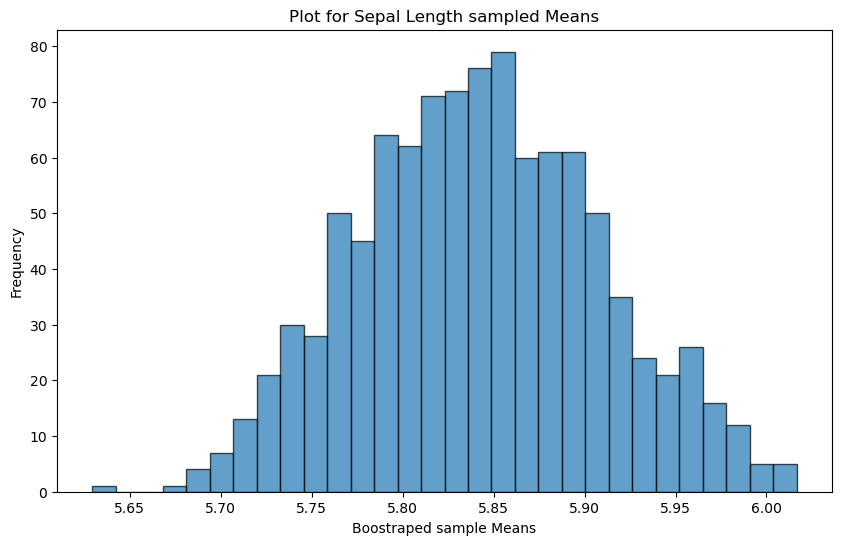

In [86]:
# Histogram shows the representation of frequency for the sample means of Sepal.Length. The data is moderately distributed about 5.85.

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create the histogram
ax.hist(BOOT_MEANS, bins=30, edgecolor='k', alpha=0.7)

# Add a title
ax.set_title('Plot for Sepal Length sampled Means')

# Add a label to the x-axis
ax.set_xlabel('Boostraped sample Means')

# Add a label to the y-axis
ax.set_ylabel('Frequency')

# Show the plot
plt.show()

_(x)_ Given your bootstrapped analysis, what do you recommend to shipping company? 

In [ ]:
# (x) Considering Sepal.Length, the mean and corresponding calculations (confidence level 95%) indicates that the value of 5.84 or 5.85 must be used to calculate the space requirement.

# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Bootstrapping|All steps are done correctly and the answers are correct.|At least one step is done incorrectly leading to a wrong answer.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.


### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applying_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
